# Laboratorio 8
- Jimena Hernández
- Mark Albrand

In [8]:
import gensim
from gensim.models import Word2Vec

## Lectura de datos

In [9]:
file = "data/reviews_data.txt"

text_content = ""
with open(file, 'r', encoding='latin-1') as file:
    text_content = file.read()

print(text_content[:100])


Oct 12 2009 	Nice trendy hotel location not too bad.	I stayed in this hotel for one night. As this i


In [10]:
""" documents = [
    "The quick brown fox jumps over the lazy dog.",
    "Artificial intelligence is transforming the world rapidly.",
    "Python is an incredibly versatile programming language.",
    "She sells seashells by the seashore on a sunny day.",
    "Data science involves statistics, coding, and domain expertise.",
    "In the heart of the forest, the birds sing their morning song.",
    "Space exploration has always captured the imagination of humanity.",
    "The coffee machine broke just before the morning rush.",
    "Quantum computing could revolutionize cryptography and data security.",
    "A warm cup of tea can be soothing on a cold winter evening."
] """

' documents = [\n    "The quick brown fox jumps over the lazy dog.",\n    "Artificial intelligence is transforming the world rapidly.",\n    "Python is an incredibly versatile programming language.",\n    "She sells seashells by the seashore on a sunny day.",\n    "Data science involves statistics, coding, and domain expertise.",\n    "In the heart of the forest, the birds sing their morning song.",\n    "Space exploration has always captured the imagination of humanity.",\n    "The coffee machine broke just before the morning rush.",\n    "Quantum computing could revolutionize cryptography and data security.",\n    "A warm cup of tea can be soothing on a cold winter evening."\n] '

In [11]:
tokenized_documents = [line.lower().split() for line in text_content.split('\n') if line]

In [12]:
print(tokenized_documents[:2])

[['oct', '12', '2009', 'nice', 'trendy', 'hotel', 'location', 'not', 'too', 'bad.', 'i', 'stayed', 'in', 'this', 'hotel', 'for', 'one', 'night.', 'as', 'this', 'is', 'a', 'fairly', 'new', 'place', 'some', 'of', 'the', 'taxi', 'drivers', 'did', 'not', 'know', 'where', 'it', 'was', 'and/or', 'did', 'not', 'want', 'to', 'drive', 'there.', 'once', 'i', 'have', 'eventually', 'arrived', 'at', 'the', 'hotel,', 'i', 'was', 'very', 'pleasantly', 'surprised', 'with', 'the', 'decor', 'of', 'the', 'lobby/ground', 'floor', 'area.', 'it', 'was', 'very', 'stylish', 'and', 'modern.', 'i', 'found', 'the', "reception's", 'staff', 'geeting', 'me', 'with', "'aloha'", 'a', 'bit', 'out', 'of', 'place,', 'but', 'i', 'guess', 'they', 'are', 'briefed', 'to', 'say', 'that', 'to', 'keep', 'up', 'the', 'coroporate', 'image.as', 'i', 'have', 'a', 'starwood', 'preferred', 'guest', 'member,', 'i', 'was', 'given', 'a', 'small', 'gift', 'upon-check', 'in.', 'it', 'was', 'only', 'a', 'couple', 'of', 'fridge', 'magnets'

## Modelo W2V

In [14]:
model = Word2Vec(
    tokenized_documents,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)

model.train(tokenized_documents, total_examples=len(tokenized_documents), epochs=2)

(65250600, 87849334)

In [20]:
common_words = ["street", "good", "dog", "mother", "bed"]

for word in common_words:
    similar = model.wv.most_similar(word, topn=10)
    print(f"Words similar to '{word}':")
    for w in similar:
        print(f"\t'{w[0]}': {w[1]}")

Words similar to 'street':
	'street,': 0.9217195510864258
	'road': 0.9087523818016052
	'road,': 0.8561813831329346
	'street)': 0.8482158780097961
	'street),': 0.8216245770454407
	'street).': 0.8208665251731873
	'street;': 0.8101434111595154
	'street-': 0.7959229946136475
	'street.': 0.7789608836174011
	'st.,': 0.7786054015159607
Words similar to 'good':
	'decent': 0.8551896214485168
	'great': 0.8441691398620605
	'good,': 0.7533841729164124
	'nice': 0.7339712977409363
	'excellent': 0.7294033765792847
	'terrific': 0.6953733563423157
	'reasonable': 0.6743040680885315
	'poor': 0.6734409332275391
	'fantastic': 0.6655979156494141
	'good.': 0.6479485630989075
Words similar to 'dog':
	'dog,': 0.7172604203224182
	'dogs': 0.7067211270332336
	'dog.': 0.6383021473884583
	'dogs,': 0.5954785943031311
	'child': 0.5713300108909607
	'cat': 0.5539245009422302
	'aunt': 0.540042519569397
	'favorite!)': 0.5301397442817688
	'uncle': 0.5294956564903259
	'son': 0.5255967378616333
Words similar to 'mother':
	'

##  PCA para reducir la dimensionalidad

In [22]:
from sklearn.decomposition import PCA

In [32]:
word_vectors = model.wv
words = list(word_vectors.key_to_index)
words = [word for word in words if word.isalpha()]
vectors = [word_vectors[word] for word in words]

In [24]:
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

## Scatter plot

In [27]:
from matplotlib import pyplot as plt

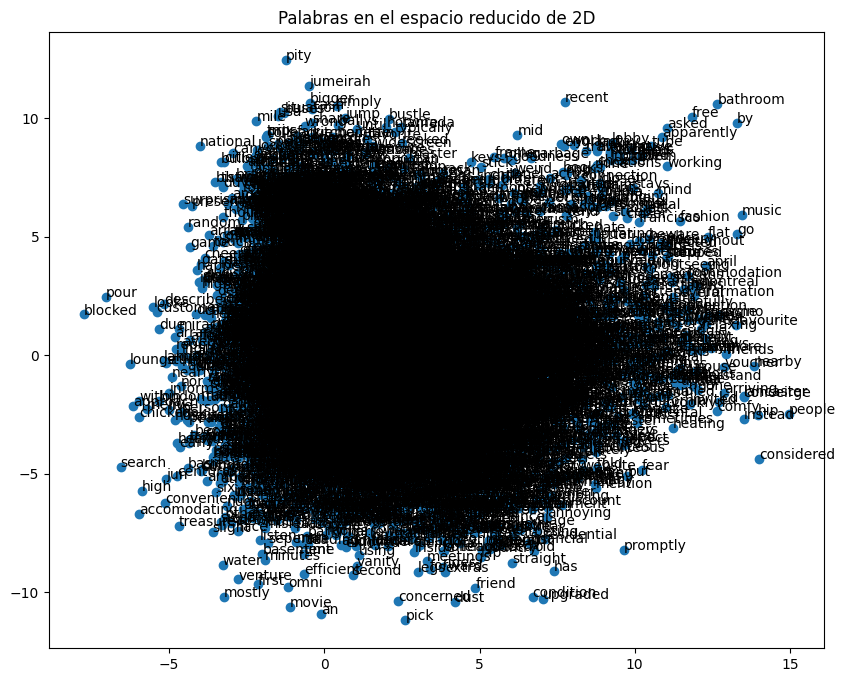

In [41]:
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]))

plt.title("Palabras en el espacio reducido de 2D")
plt.show()

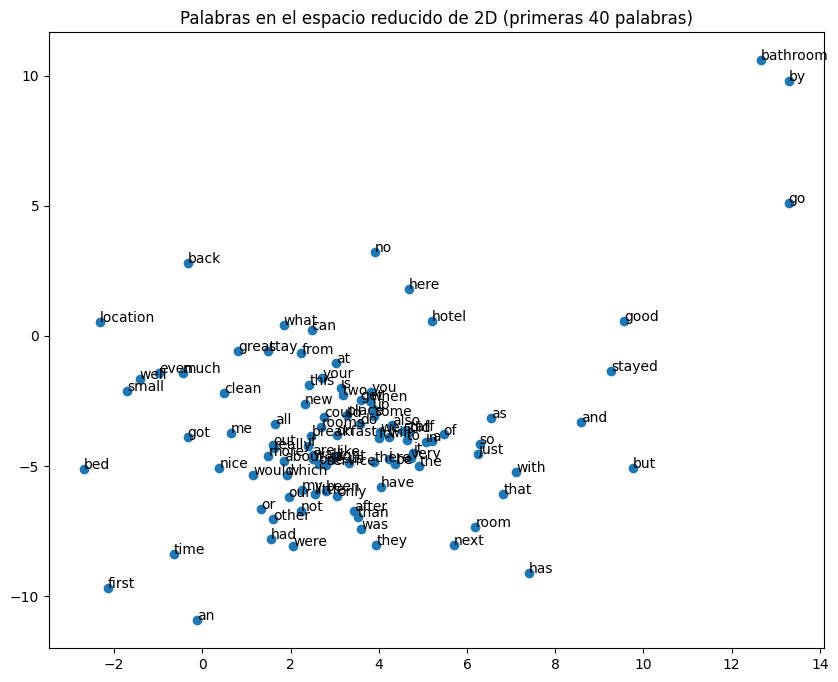

In [42]:
limit = 100
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:limit, 0], vectors_2d[:limit, 1])

for i, word in enumerate(words[:limit]):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]))

plt.title("Palabras en el espacio reducido de 2D (primeras 100 palabras)")
plt.show()